# ÁRBOLES DE DECISIÓN 


### Transformaciones 


In [21]:
# #? Cargamos las librerias
from sklearn import tree 

### Cargamos los datos desde un archivo .CSV

In [22]:
# Cargamos las librerias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [23]:
datos = pd.read_csv("./dataset/Dataset.csv")
datos

,resting-ecg,maximum-heart-rate,thal,class
0,Hyp,132,Rev,Sick
1,Normal,171,Normal,Healthy
2,Hyp,144,Normal,Healthy
3,Hyp,147,Rev,Sick
4,Hyp,155,Rev,Sick
...,...,...,...,...
298,Normal,175,Normal,Healthy
299,Normal,168,Rev,Healthy
300,Hyp,126,Normal,Sick
301,Hyp,121,Normal,Healthy


###  Renombramos las etiquetas de las columnas del dataset

In [24]:
datos = datos.rename(columns={'resting-ecg':'Reposo',
                              'maximum-heart-rate':'Frecuencia_Cardiaca',	
                              'thal':'Anemia',
                              'class':'Diagnostico'})
datos

,Reposo,Frecuencia_Cardiaca,Anemia,Diagnostico
0,Hyp,132,Rev,Sick
1,Normal,171,Normal,Healthy
2,Hyp,144,Normal,Healthy
3,Hyp,147,Rev,Sick
4,Hyp,155,Rev,Sick
...,...,...,...,...
298,Normal,175,Normal,Healthy
299,Normal,168,Rev,Healthy
300,Hyp,126,Normal,Sick
301,Hyp,121,Normal,Healthy


### Transformamos los valores nominales a numéricos 

In [25]:
a = {'Rev':0, 'Fix':2,'Normal':1}
b = {'Hyp':0,'Normal':1,'Abnormal':2}
c = {'Sick':0, 'Healthy':1}
datos['Reposo'] = datos['Reposo'].map(b)
datos['Anemia'] = datos['Anemia'].map(a)
datos['Diagnostico'] = datos['Diagnostico'].map(c)
datos

,Reposo,Frecuencia_Cardiaca,Anemia,Diagnostico
0,0,132,0,0
1,1,171,1,1
2,0,144,1,1
3,0,147,0,0
4,0,155,0,0
...,...,...,...,...
298,1,175,1,1
299,1,168,0,1
300,0,126,1,0
301,0,121,1,1


In [26]:
datos

,Reposo,Frecuencia_Cardiaca,Anemia,Diagnostico
0,0,132,0,0
1,1,171,1,1
2,0,144,1,1
3,0,147,0,0
4,0,155,0,0
...,...,...,...,...
298,1,175,1,1
299,1,168,0,1
300,0,126,1,0
301,0,121,1,1


### Cambiamos las etiquetas de diagnostico
* DIAGNOSTICO
- Sick = 0
- Healthy = 1
* REPOSO
- Abnormal = 2
- Hyp :3
- Normal_reposo = 4
* TAL
- Rev = 5
- Normal_tal = 6
- Fix = 7

#### Variables dependientes e independientes

In [27]:
# Variables Independientes
 
vi = ['Reposo', 'Frecuencia_Cardiaca', 'Anemia']
x = datos[vi].values

# Variable dependiente

y = datos['Diagnostico']

In [28]:
# import warnings
# warnings.filterwarnings('ignore')

### Generar el modelo de clasificacion

In [29]:
# Definimos una variable para el algoritmo de clasificación

clasificador = tree.DecisionTreeClassifier()

# Entrenar al algoritmo de Clasificación

clasificador.fit(x,y)

# Predicciones

predicciones = clasificador.predict([[1,150,0]])

if predicciones == 0:
    print('Enfermo')
else:
    print('Sano')
 

Sano


* DIAGNOSTICO
- Sick = 0
- Healthy = 1
* REPOSO
- Abnormal = 2
- Hyp :3
- Normal_reposo = 4
* TAL
- Rev = 5
- Normal_tal = 6
- Fix = 7

### Arboleda

<function matplotlib.pyplot.show(close=None, block=None)>

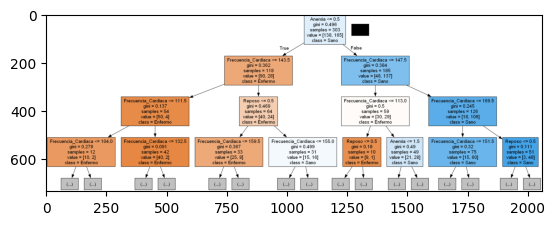

In [30]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

clase = ['Enfermo', 'Sano'] 

datos = tree.export_graphviz(clasificador, 
                            class_names=clase,
                            feature_names=vi,
                            filled=True,
                            max_depth=3
                            )
graph = pydotplus.graph_from_dot_data(datos)
graph.write_png('miarbol3.png')
imagen = pltimg.imread('miarbol3.png')
plt.imshow(imagen)
plt.show